In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
url = "http://api.openweathermap.org/data/2.5/weather?"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
# Get weather data

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
api_keys="823049a987d0638d9c0642be58f6e973"
# Print the city count to confirm sufficient count
len(cities)
print(cities)

['tasiilaq', 'dergachi', 'nara', 'vao', 'panjakent', 'tsihombe', 'otavi', 'port hueneme', 'avarua', 'bethel', 'taolanaro', 'belushya guba', 'rio grande', 'vogar', 'mys shmidta', 'litija', 'alto araguaia', 'east london', 'mogapi', 'hasaki', 'illoqqortoormiut', 'atuona', 'punta arenas', 'angoche', 'nikolskoye', 'busselton', 'aswan', 'tinos', 'new norfolk', 'neuquen', 'usinsk', 'hithadhoo', 'saskylakh', 'esperance', 'wildeshausen', 'puerto ayora', 'grindavik', 'igrim', 'airai', 'cape town', 'albany', 'ushuaia', 'constitucion', 'codrington', 'san cristobal', 'tutoia', 'saint-philippe', 'inhambane', 'nizhneyansk', 'rikitea', 'sawakin', 'sitka', 'barrow', 'aklavik', 'port hedland', 'college', 'beloha', 'pitkyaranta', 'mutsu', 'pisco', 'kirakira', 'atasu', 'mataura', 'sao joao da barra', 'barentsburg', 'tuktoyaktuk', 'mar del plata', 'victor harbor', 'lokosovo', 'oussouye', 'bilma', 'fortuna', 'east stroudsburg', 'leningradskiy', 'samusu', 'kembolcha', 'bolgatanga', 'yumen', 'upernavik', 'vai

In [4]:
queryurl = url + "appid=" + api_keys


In [7]:
response = requests.get(f"{queryurl}&q={city}").json() 
response

{'coord': {'lon': 80.86, 'lat': 59.06},
 'weather': [{'id': 600,
   'main': 'Snow',
   'description': 'light snow',
   'icon': '13d'}],
 'base': 'model',
 'main': {'temp': 266.16,
  'feels_like': 258.68,
  'temp_min': 266.16,
  'temp_max': 266.16,
  'pressure': 1007,
  'humidity': 93,
  'sea_level': 1007,
  'grnd_level': 1000},
 'wind': {'speed': 6.56, 'deg': 204},
 'snow': {'3h': 0.63},
 'clouds': {'all': 100},
 'dt': 1582078331,
 'sys': {'country': 'RU', 'sunrise': 1582077801, 'sunset': 1582112274},
 'timezone': 25200,
 'id': 1504382,
 'name': 'Kargasok',
 'cod': 200}

In [6]:
citynames=[]
clouds=[]
countries=[]
dates=[]
humidities=[]
latitudes=[]
longitudes=[]
temperatures=[]
windspeeds=[]

record=1

print("Beginning Data Retrieval")
print("------------------------")

for city in cities:
    response = requests.get(f"{queryurl}&q={city}").json() 
    try:
        citynames.append(response["name"])
        clouds.append(response["clouds"]["all"])
        countries.append(response["sys"]["country"])
        dates.append(response["dt"])
        humidities.append(response["main"]["humidity"])
        latitudes.append(response["coord"]["lat"])
        longitudes.append(response["coord"]["lon"])
        temperatures.append(response["main"]["temp_max"])
        windspeeds.append(response["wind"]["speed"])
        cityid=response["name"]
        print(f"Processing Record {record} | {cityid}")
        print(f"{queryurl}&q={city}")

        record=record+1
        time.sleep(1.01)

    except:
        print("City not found. Skipping...")


Beginning Data Retrieval
------------------------
Processing Record 1 | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=tasiilaq
Processing Record 2 | Dergachi
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=dergachi
Processing Record 3 | Nara
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=nara
Processing Record 4 | Vao
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=vao
Processing Record 5 | Panjakent
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=panjakent
City not found. Skipping...
Processing Record 6 | Otavi
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=otavi
Processing Record 7 | Port Hueneme
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=port hueneme
Processing Record 8 | Avarua
http://api.

Processing Record 63 | Oussouye
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=oussouye
Processing Record 64 | Bilma
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=bilma
Processing Record 65 | Fortuna
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=fortuna
Processing Record 66 | East Stroudsburg
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=east stroudsburg
Processing Record 67 | Leningradskiy
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=leningradskiy
City not found. Skipping...
Processing Record 68 | Kombolcha
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=kembolcha
Processing Record 69 | Bolgatanga
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=bolgatanga
Processing Record 70 | Yumen
http://api.openw

Processing Record 125 | Kavaratti
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=kavaratti
Processing Record 126 | Micheweni
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=micheweni
Processing Record 127 | Loukhi
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=loukhi
Processing Record 128 | Redlands
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=redlands
Processing Record 129 | Mayumba
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=mayumba
Processing Record 130 | Husavik
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=husavik
Processing Record 131 | San Jeronimo
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=san jeronimo
City not found. Skipping...
Processing Record 132 | Logan
http://api.openweathermap.or

Processing Record 187 | Saint-Marc-des-Carrieres
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=saint-marc-des-carrieres
Processing Record 188 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=port hardy
Processing Record 189 | Somanda
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=somanda
Processing Record 190 | Saint-Augustin
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=saint-augustin
Processing Record 191 | Clyde River
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=clyde river
Processing Record 192 | Gongzhuling
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=gongzhuling
Processing Record 193 | Ullal
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=ullal
Processing Record 194 | Jizan
http://a

Processing Record 249 | Alofi
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=alofi
Processing Record 250 | Muisne
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=muisne
Processing Record 251 | Kabanjahe
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=kabanjahe
Processing Record 252 | Waycross
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=waycross
Processing Record 253 | Ancud
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=ancud
Processing Record 254 | Padang
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=padang
Processing Record 255 | Umm Lajj
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=umm lajj
Processing Record 256 | Penha
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be5

Processing Record 310 | Kampot
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=kampot
Processing Record 311 | Rock Hill
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=rock hill
Processing Record 312 | Santa Maria
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=santa maria
Processing Record 313 | Lorengau
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=lorengau
Processing Record 314 | Bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=bathsheba
Processing Record 315 | Severo-Kuril'sk
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=severo-kurilsk
Processing Record 316 | Mae Sai
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=mae sai
Processing Record 317 | Katsuura
http://api.openweathermap.org/data/2.5/w

Processing Record 372 | Qasigiannguit
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=qasigiannguit
Processing Record 373 | Anadyr
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=anadyr
Processing Record 374 | Nisibis
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=nusaybin
Processing Record 375 | Sarkand
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=sarkand
Processing Record 376 | Ixtapa
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=ixtapa
Processing Record 377 | Moyamba
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=moyamba
Processing Record 378 | Menongue
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=menongue
Processing Record 379 | Mossamedes
http://api.openweathermap.org/data/2.5/weather?appid=82304

Processing Record 434 | Le Port
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=le port
Processing Record 435 | Khash
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=khash
Processing Record 436 | Mala
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=mala
Processing Record 437 | Arona
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=arona
Processing Record 438 | Gidam
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=gidam
Processing Record 439 | Ucluelet
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=ucluelet
Processing Record 440 | Olafsvik
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=olafsvik
Processing Record 441 | Ried
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=r

Processing Record 497 | Iracoubo
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=iracoubo
Processing Record 498 | Bogorodskoye
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=bogorodskoye
Processing Record 499 | Ashtabula
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=ashtabula
Processing Record 500 | Yelizovo
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=yelizovo
Processing Record 501 | Espinosa
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=espinosa
Processing Record 502 | Belyy Yar
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=belyy yar
Processing Record 503 | Faya
http://api.openweathermap.org/data/2.5/weather?appid=823049a987d0638d9c0642be58f6e973&q=faya
Processing Record 504 | Abnub
http://api.openweathermap.org/data/2.5/weather?appid=823

In [8]:
weather_py= {"City":citynames,
            "Clouds":clouds,
            "Country":countries,
            "Dates":dates,
            "Humidities":humidities,
            "Latitudes":latitudes,
            "Longituudes":longitudes,
            "Temperatures":temperatures,
            "Windspeeds":windspeeds}

weather_pydata=pd.DataFrame(weather_py)
weather_pydata.count()

City            547
Clouds          547
Country         547
Dates           547
Humidities      547
Latitudes       547
Longituudes     547
Temperatures    547
Windspeeds      547
dtype: int64

In [9]:
weather_pydata.to_csv('weather_pydata2.csv')

In [11]:
weather_pydata.head()

,City,Clouds,Country,Dates,Humidities,Latitudes,Longituudes,Temperatures,Windspeeds
0,Tasiilaq,100,GL,1582077726,85,65.61,-37.64,267.15,8.20
1,Dergachi,100,RU,1582077727,95,51.23,48.77,273.92,7.71
2,Nara,75,JP,1582077515,50,34.69,135.80,283.15,4.60
3,Vao,6,NC,1582077729,73,-22.67,167.48,299.37,4.83
4,Panjakent,40,TJ,1582077609,85,39.50,67.61,269.15,4.10


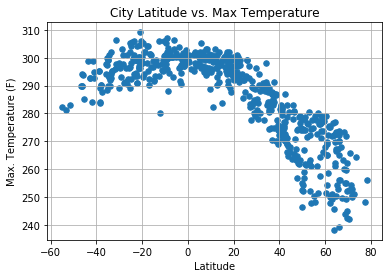

In [20]:
plt.scatter(weather_pydata["Latitudes"], weather_pydata["Temperatures"], marker="o", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitudes_vs_Temperature.png")

# Show plot
plt.show()

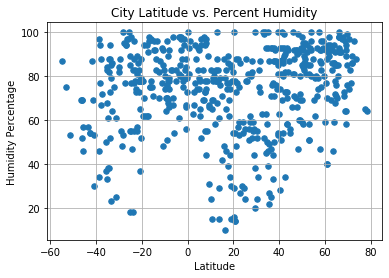

In [16]:
plt.scatter(weather_pydata["Latitudes"], weather_pydata["Humidities"], marker="o", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Percent Humidity")
plt.ylabel("Humidity Percentage")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitudes_vs_Humidity.png")

# Show plot
plt.show()

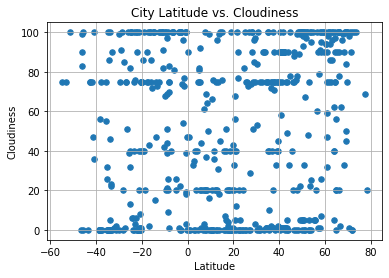

In [17]:
plt.scatter(weather_pydata["Latitudes"], weather_pydata["Clouds"], marker="o", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitudes_vs_Clouds.png")

# Show plot
plt.show()

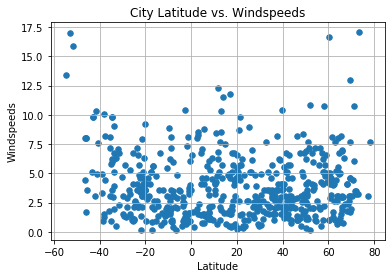

In [19]:
plt.scatter(weather_pydata["Latitudes"], weather_pydata["Windspeeds"], marker="o", s=30)

# Incorporate the other graph properties
plt.title("City Latitude vs. Windspeeds")
plt.ylabel("Windspeeds")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitudes_vs_Windspeeds.png")

# Show plot
plt.show()